## Training models

In this chapter we will start with linear regression, We will discuss two different ways to train it,
+ Using a direct "closed-form" equation that directly computes the model paramters that best fit the model to training set. (i.e. , the model parameters that minimize the cost function over the training set.)
+ Using a iterative optimization approach, called Gradient Descent, that gradually tweaks the model parameters to minimize the cost function over the training set,eventually converging to the same set of parameters as the first method.

Next we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets.

Finally we will look at two more models that are commonly used for classification, Logistic Regression and Softmax Regression.

### Linear Regression

Vectorised form : y_hat = h_theta(X) = theta_transpose[1,n] * X[n,1].
Training the model means setting the parameters(theta). For this we need a measure of how well (or poorly) the model fits the training data. RMSE or MSE can be minimized to find the best thetha.
<!-- \begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*} 
-->

The Normal Equation
theta_hat = (X_transpose * X)^-1 * (X_transpose) * y

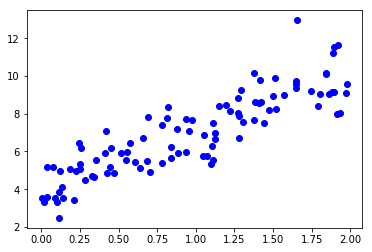

In [1]:
# Let us generate some linear looking data
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y,'bo')
plt.show()

[[3.96660547]
 [3.12760372]]


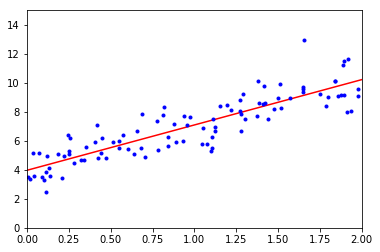

In [2]:
# Using the Normal equation finding theta_hat
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# Function generated was y = 4 + 3X + White Noise.
# theta_best : [4.23524939], [2.8365066 ]
print(theta_best)

# In order to make predicts now,
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# Equivalent sci-kit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.96660547],
       [10.22181291]])

### Time Complexity
The normal equation computes the inverse of X_transpose * X which is an n X n matrix (n number of features). The computational complexity of inverting such a matrix is O(n^2.4) to O(n^3). If you double the number of features the training time increases 8 times.
On the positive side, this equation is linear with regards to the number of instances in the training set (it is O(m)), so it handles large data efficiently provided it has sufficient memory.
After training is done predictions are faster.

Now we will look at very different ways to train a Linear Regression model, better suited for cases
where there are a large number of features, or too many training instances to fit in memory.

### Gradient Descent
Gradient descent is a very generic optimization problem to a wide range of problems. The idea is to tweak the parameters iteratively till you minimize the cost function. It measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

You start by filing θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g the MSE), until the algorithm converges to a minimum.

![](GD_start.png)

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

![](GD_slow.png)

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

![](GD_fast.png)

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all
sorts of irregular terrains, making convergence to the minimum very difficult. Two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

![](GD_fast.png)

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which
means that if you pick any two points on the curve, the line segment joining them never crosses the curve.
This implies that there are no local minima, just one global minimum. It is also a continuous function with
a slope that never changes abruptly. These two facts have a great consequence: Gradient Descent is
guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning
rate is not too high).
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales.

In [4]:
# Implementation of Batch gradient descent implementation.
X_b = np.c_[np.ones((100, 1)), X]
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1) # random initialisation.
# print(theta)

# print(float(2)/m)
# print(X_b.T.dot(X_b.dot(theta) - y))

for iterations in range(n_iterations):
    gradients = (float(2)/m) * (X_b.T.dot(X_b.dot(theta) - y))
    #     print(gradients)
    theta = theta - (eta * gradients)
    
theta
# Doesnt converge for me. dont know what is problem.
# Resolution 2/m was giving out zero. float(2)/m gave proper result now gradients get non-zero values.

array([[3.8951324 ],
       [3.18915783]])

### Stochastic Gradient Descent
+ Main problem with batch gradient descent is that it used the whole trainig set to compute the gradients at ever step, which makes it very slow when the training set is huge.
+ At the opposite end *Stochastic Gradient Descent* just picks a random instance in the training set at every steps and computes the gradients based only on that single instance.
    * This makes it faster
    * Only one instance needs to be in memory.
+ On other hand, due to stochastic (random) nature, this algo is less regular than Batch Gradient Descent. Instead of gently reaching the minimum, it will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it reaches it will continue to bounce.
    * Once the alogrithm stops, the parameters will be good, but not optimal.
    * When the cost function is irregular SGD can help to jump out of a local minima, hence it has more chances of reaching global minima than Batch Gradient.
    
![](SGD_1.png)

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [5]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return float(t0) / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        

# By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch
# Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the
# training set only 50 times and reaches a fairly good solution:        
theta

array([[3.96021154],
       [3.08136567]])

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\ishant.wankhede\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.99200709]), array([3.18500894]))

### Mini-batch Gradient Descent
* instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches.
* The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

![](SGD_Compare.png)
![](LR_Stats.png)

### Polynomial Regression
* What if your data is actually more complex than a simple straight line?
* We achieve this by adding powers to each feature as new feature and then train a linear model on this extended set of features. This technique is call polynomial regression.

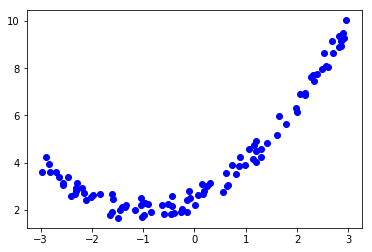

In [7]:
# Create some random quadratice data.
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y,'bo')
plt.show()

In [8]:
# Clearly linear line wont be able to fit.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print X[0], X_poly[0]

[2.38689573] [2.38689573 5.69727124]


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_
# original: y = 0.5 * x^2 + 1.0x + 2 + white_noise
# predicted: y^ = 0.508 * x^2 + 0.98* x + 2.49

(array([2.52624608]), array([[0.98318775, 0.49238127]]))

In [10]:
### Decision Boundaries
# Let us use the Iris dataset.
# Let us build a classifier to detect Iris-Virginica type based only on petal width feature.
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [11]:
X = iris["data"][:,3:] # Petal length
y = (iris["target"]==2).astype(np.int)

#Now let us train a Logit model.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

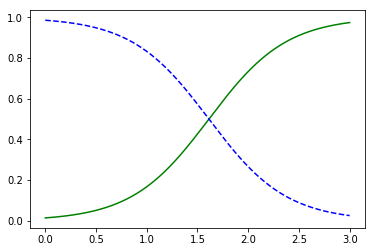

In [12]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

![](Logit_viriginica.png)

![](Logit_viriginica.png)

### Pretty Diagram
![](logit_virginica.png)

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):

In [13]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

![](logit_two_features.png)
Figure above shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features.

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15 (bottom left) to 90%(top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica
according to the model.

### PS : The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.